## NLP in python

Extracting information from the text is very popular and can be done in many ways like finding most frequent words in texts, finding important information in a corpus, comparing texts, knowing the the main idea in the text without reading whole article, deducing people name, country etc. all these task can be done using programming and NLP tools and library instead of reading whole article or doing manually took really so much time which poeple can't efford always.

* In this notebook I will do some of the task to extract usefull information from the article 
* for this work I scraped a article from medium https://medium.com/@ODSC/data-science-2021-trends-what-to-expect-433cf43eaeac
* This article is about "data science 2021 trends what to expect"

Content of the notebook

<ins> 1. Scraping Article</ins> 

<ins> 2. Preprocessing text</ins>

<ins> 3. Visualisation</ins>

<ins> 4. LDA model for Clusterisation </ins>

<ins> 5. Conclusion </ins>

In [32]:
#import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import spacy
import requests as r
from bs4 import BeautifulSoup
import re
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Scraping the article from Medium

In [33]:
#get the request 
resp = r.get('https://medium.com/@ODSC/data-science-2021-trends-what-to-expect-433cf43eaeac')

In [34]:
#whole content of the page 
resp.content

b'<!doctype html><html lang="en"><head><script defer src="https://cdn.optimizely.com/js/16180790160.js"></script><title data-rh="true">Data Science 2021 Trends: What to Expect | by ODSC - Open Data Science | Medium</title><meta data-rh="true" charset="utf-8"/><meta data-rh="true" name="viewport" content="width=device-width,minimum-scale=1,initial-scale=1"/><meta data-rh="true" name="theme-color" content="#000000"/><meta data-rh="true" name="twitter:app:name:iphone" content="Medium"/><meta data-rh="true" name="twitter:app:id:iphone" content="828256236"/><meta data-rh="true" property="al:ios:app_name" content="Medium"/><meta data-rh="true" property="al:ios:app_store_id" content="828256236"/><meta data-rh="true" property="al:android:package" content="com.medium.reader"/><meta data-rh="true" property="fb:app_id" content="542599432471018"/><meta data-rh="true" property="og:site_name" content="Medium"/><meta data-rh="true" property="og:type" content="article"/><meta data-rh="true" property="

In [35]:
#create named variable soup to store all the content 
soup = BeautifulSoup(resp.content)

In [36]:
#select the heading of the article 
#soup.select('h1')

In [37]:
#select only text from the article 
text = [i.text for i in soup.find_all('p')]

In [38]:
text

['Sign in',
 'ODSC - Open Data Science',
 'Jan 21·6 min read',
 '2020 was a strange year and no one could have predicted what would happen. When we looked at trending topics around this time last year, we based it off of the usual trends and developments that we could have expected. With COVID and the new normal, data science and AI growth were also impacted. A larger emphasis has been placed on remote collaboration, and medical professionals have looked to AI to help with diagnosis. As we look to 2021, data science and AI professionals have varying opinions on what to expect for the year ahead, and here are some data science 2021 trends to keep an eye out for.',
 'Dr. Jon Krohn | Chief Data Scientist | untapt',
 '2020 was a big year for bringing the conversation around unwanted demographic biases into the mainstream of the ML community’s consciousness, but there’s a lot of hard work ahead to now resolve these widespread issues.',
 'Violeta Misheva | Data Scientist | ABN Amro Bank',
 '

# Propressing the text

In [45]:
# Cleaing the text
processed_text = str(text).lower()
processed_text = re.sub('[^a-zA-Z]', ' ', processed_text )
processed_text = re.sub(r'\s+', ' ', processed_text)
processed_text

' sign in odsc open data science jan min read was a strange year and no one could have predicted what would happen when we looked at trending topics around this time last year we based it off of the usual trends and developments that we could have expected with covid and the new normal data science and ai growth were also impacted a larger emphasis has been placed on remote collaboration and medical professionals have looked to ai to help with diagnosis as we look to data science and ai professionals have varying opinions on what to expect for the year ahead and here are some data science trends to keep an eye out for dr jon krohn chief data scientist untapt was a big year for bringing the conversation around unwanted demographic biases into the mainstream of the ml community s consciousness but there s a lot of hard work ahead to now resolve these widespread issues violeta misheva data scientist abn amro bank i am excited to follow all the new research in the area of xai but i often w

In [46]:
# Preparing the dataset
sentences = nltk.sent_tokenize(processed_text)
words = [nltk.word_tokenize(sent) for sent in sentences]

In [47]:
# Removing Stop Words
lst_word = []                   #store all the cleaned dont contain stop words in this variable 
for i in range(len(words)):
    words[i] = [w for w in words[i] if w not in stopwords.words('english')]
    lst_word.append(words[i])
print(lst_word)

[['sign', 'odsc', 'open', 'data', 'science', 'jan', 'min', 'read', 'strange', 'year', 'one', 'could', 'predicted', 'would', 'happen', 'looked', 'trending', 'topics', 'around', 'time', 'last', 'year', 'based', 'usual', 'trends', 'developments', 'could', 'expected', 'covid', 'new', 'normal', 'data', 'science', 'ai', 'growth', 'also', 'impacted', 'larger', 'emphasis', 'placed', 'remote', 'collaboration', 'medical', 'professionals', 'looked', 'ai', 'help', 'diagnosis', 'look', 'data', 'science', 'ai', 'professionals', 'varying', 'opinions', 'expect', 'year', 'ahead', 'data', 'science', 'trends', 'keep', 'eye', 'dr', 'jon', 'krohn', 'chief', 'data', 'scientist', 'untapt', 'big', 'year', 'bringing', 'conversation', 'around', 'unwanted', 'demographic', 'biases', 'mainstream', 'ml', 'community', 'consciousness', 'lot', 'hard', 'work', 'ahead', 'resolve', 'widespread', 'issues', 'violeta', 'misheva', 'data', 'scientist', 'abn', 'amro', 'bank', 'excited', 'follow', 'new', 'research', 'area', 'xa

# Visualizations to show some important information 

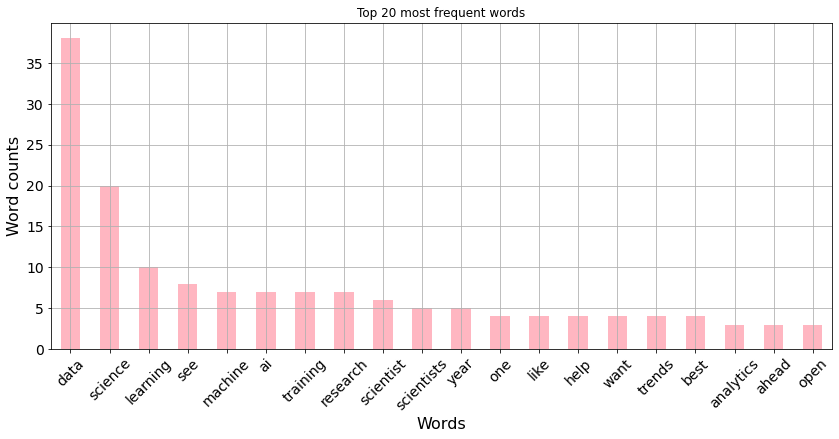

In [48]:
# Get the top 20 most frequent words from the text
df = pd.DataFrame(lst_word[0])
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize = (14,6))
df[0].value_counts().head(20).plot(kind = 'bar', color='lightpink')
plt.title('Top 20 most frequent words')
plt.xlabel('Words', fontsize = 16)
plt.ylabel('Word counts', fontsize = 16)
plt.grid()
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.show()

As we can see all the most frequent words are related to data science which signifies this article can about data science

In [49]:
#create wordcloud
wc = WordCloud(max_font_size=None,max_words = 100, background_color="black", height = 800, width = 1200)

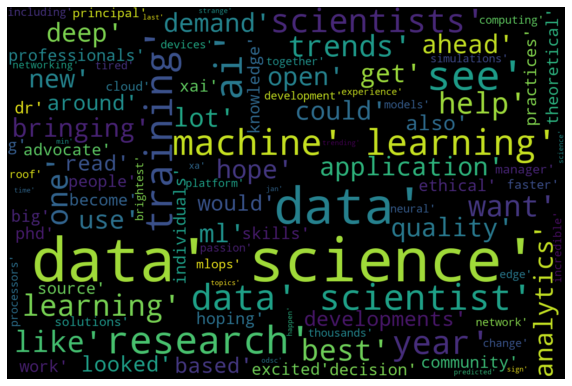

In [50]:
#generate wordcloud 
wc.generate(str(lst_word[0]))
plt.figure(figsize=(10,16))
plt.imshow(wc , interpolation='bilinear')
plt.axis("off")
plt.show()

bigger word have more frequency in the article

In [51]:
#to save the picture into .png format
wc.to_file('wc_output.png')

# LDA model for topic clusterisation 

This is a powerfull model used in NLP for topic knowledge from the corpus, it means that this model will use all the simila stemmed word to cluster into one topic. and we can also do interactive visualization with LDA 

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils
from gensim.models.ldamodel import LdaModel
import gensim.models.ldamodel 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(lst_word)
# Create Corpus
texts = lst_word
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 3), (13, 7), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
from pprint import pprint

num_topics = 4      # select the number of topic I want to extract from the article  

#model 
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#keywords in the topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"data" + 0.022*"science" + 0.013*"learning" + 0.010*"see" + '
  '0.009*"machine" + 0.009*"scientist" + 0.008*"research" + 0.007*"training" + '
  '0.007*"ai" + 0.006*"scientists"'),
 (1,
  '0.023*"data" + 0.014*"science" + 0.008*"learning" + 0.007*"ai" + '
  '0.007*"machine" + 0.007*"see" + 0.006*"research" + 0.005*"scientist" + '
  '0.005*"training" + 0.005*"year"'),
 (2,
  '0.046*"data" + 0.023*"science" + 0.010*"learning" + 0.009*"research" + '
  '0.009*"see" + 0.008*"training" + 0.008*"ai" + 0.007*"machine" + '
  '0.007*"year" + 0.007*"scientists"'),
 (3,
  '0.028*"data" + 0.018*"science" + 0.010*"learning" + 0.009*"training" + '
  '0.008*"see" + 0.008*"ai" + 0.007*"machine" + 0.007*"scientist" + '
  '0.007*"research" + 0.005*"best"')]


In [160]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002191  0.001269       1        1  69.161915
2      0.002479 -0.001210       2        1  30.754658
3     -0.001062  0.000004       3        1   0.042040
1     -0.003608 -0.000062       4        1   0.041387, topic_info=            Term       Freq      Total Category  logprob  loglift
87          data  28.000000  28.000000  Default  30.0000  30.0000
322      science  14.000000  14.000000  Default  29.0000  29.0000
212     learning   7.000000   7.000000  Default  28.0000  28.0000
326          see   5.000000   5.000000  Default  27.0000  27.0000
223      machine   5.000000   5.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
264          one   0.000980   3.140393   Topic4  -5.5790  -0.2824
19     analytics   0.000901   2.545801   Topic4  -5.6629  -0.1564
24   application   0.000877   2.433840   Topic4  -5.6899  -0.1385
302      quality   0.000884   2.562789   Topic4  -5.6817  -0.1818
91          deep   0.000879   2.499063   Topic4  -5.6882  -0.1632

[282 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.925266             abn
5         1  0.942389  accountability
7         1  0.901363        adoption
8         1  0.932107        advanced
12        1  0.733802           ahead
...     ...       ...             ...
395       2  0.292316            want
405       1  0.828866        williams
411       1  0.583378             xai
412       1  0.779640            year
412       2  0.259880            year

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

left side 4 numbers shows the number of topics which I have selected and in right side the frequency rate of each words mention in the particular article. if you want to know which words are mostly appeared in topic 1 you need to click on Circle 1 

# Conclusion 

with help of above two visualization and this LDA model I conclude that this article is mainy about data science. there is only two important topics in this article and both topics is strongly related to data science related words like machine learning, ai etc..

I just heard about this article before but now I used it for first time. I found it is really interesting and powerfull tool in nlp domain, I will improve this notebook by doing further analysis of this model and evaluation. 